## Exercise 3

#### Name: Charles Kevin Bandala

#### Student Number: 202220041

In [1]:
# Libraries

library(fpp2)
library(forecast)


Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

-- Attaching packages ---------------------------------------------- fpp2 2.5 --

v ggplot2   3.4.1     v fma       2.5  
v forecast  8.21      v expsmooth 2.3  





### Part I, sale_app data

#### Data

In [119]:
Philmonth <- read.csv("/Users/ckabandala/Desktop/FILES/PMDSA/PMDSA Files/Forecasting Analytics/Datasets/PhilMonthlyData.csv", header = TRUE)

sale_data <- ts(na.omit(Philmonth$sale_app), start = c(2000, 1), end = c(2009, 12), frequency = 12)

#### Train & Test dataset

In [120]:
sale_train <- window(sale_data, end = c(2007, 12)) # January 2000 - December 2007
sale_test <- window(sale_data, start = c(2008, 1)) # January 2008 - December 2009

#### 1)

In [ ]:
sale_best <- ets(sale_train, model = "ZZZ")

**Show the best performing model based on the AICc of the training dataset**

In [145]:
sale_best

ERROR: Error in parse(text = x, srcfile = src): <text>:2:0: unexpected end of input
1: sale_best$
   ^


In [69]:
sale_best <- ets(sale_train, model = "ZZZ")
summary(sale_best)

# Best model is M,A,M or multiplicative Holt-Winter's method

ETS(M,A,M) 

Call:
 ets(y = sale_train, model = "ZZZ") 

  Smoothing parameters:
    alpha = 0.5734 
    beta  = 0.0139 
    gamma = 2e-04 

  Initial states:
    l = 597464.3559 
    b = 1084.4734 
    s = 1.2361 1.1346 1.0226 0.9175 0.9177 0.9557
           1.0759 1.1248 1.013 0.9696 0.8006 0.832

  sigma:  0.0714

     AIC     AICc      BIC 
2463.934 2471.780 2507.528 

Training set error measures:
                    ME    RMSE   MAE       MPE     MAPE      MASE        ACF1
Training set -3819.613 33707.2 26105 -1.060642 5.279745 0.3384195 -0.01535319

**Show the state space system of equations form of the model with estimated parameter values**

![Alt text](<Screen Shot 2023-11-14 at 13.00.16.png>)

#### 2)

**Show a plot of the forecasted value of sale_app for the test data added into the plot of the full dataset.**

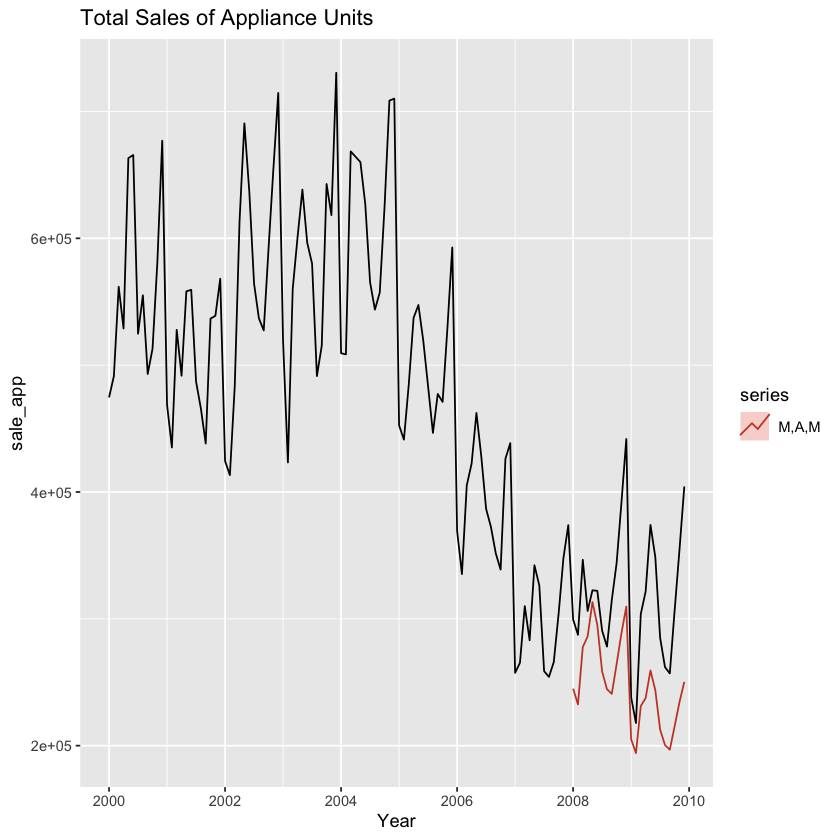

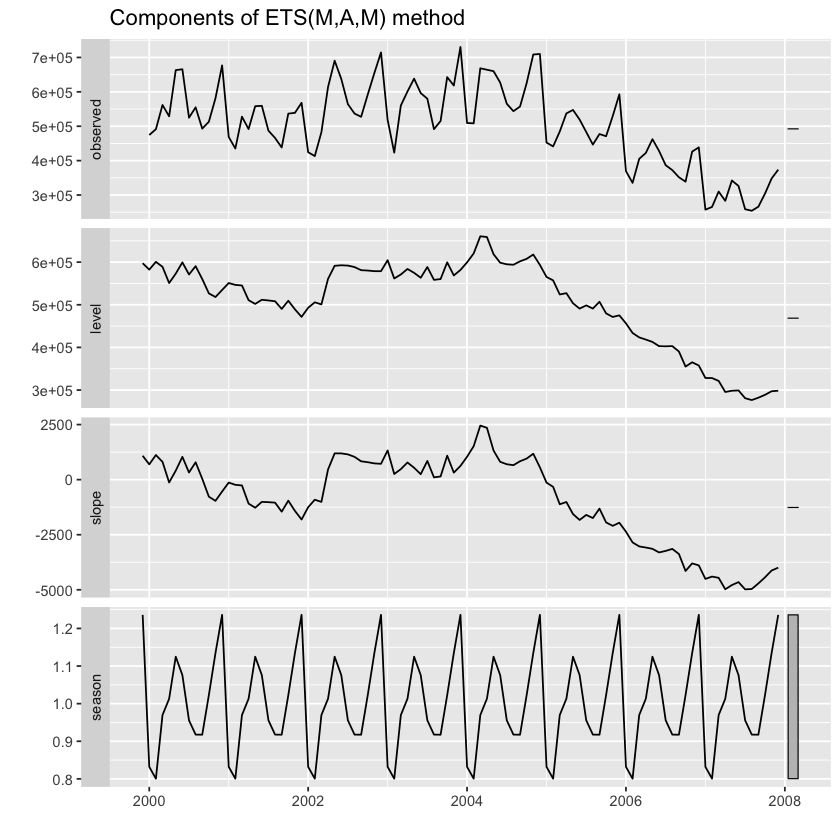

In [131]:
sale_bestf <- forecast(sale_best, h = 24)

autoplot(sale_data)+
    autolayer(sale_bestf, series="M,A,M", PI = FALSE) +
    ggtitle("Total Sales of Appliance Units") + xlab("Year") +
    ylab("sale_app")

autoplot(sale_best)

**Analyze the plot in terms of the forecasting performance selected model (1).**

Best model yielded by the ets() function is M,A,M. Fitted model fails to capture the spikes of the test data. However, it reflects the downward trend and seasonality of the recent observations. α (0.5734) is relatively closer to 1 than 0, which means that values significantly change every period and and weighted to more recent observations. On the other hand, β (0.0139) and γ (2e-04) are very low, meaning trend (slope) and seasonal components change very little across the periods.

#### 3)

**Generate the accuracy measures of the selected model with respect to the testing dataset.**

In [67]:
accuracy(sale_bestf, sale_test)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,-3819.613,33707.20,26105.00,-1.060642,5.279745,0.3384195,-0.01535319,NA
Test set,70063.980,79393.65,70063.98,21.273237,21.273237,0.9082941,0.53730178,1.493705


**Write a short analysis based on the accuracy measures.**

Most of the accuracy measures suggest that the lower the value, the better. With that said, you need other models to compare. In this case, I will use MAPE for analysis. Training and test set of the model is 5.279745% and 21.273237%, respectively. Selected model seems to fit well in training set. However, the error increases in test set. One reason could be the selected model forecasted the downward trend of the recent observations.

#### 4)

**Check the residuals of the selected model in (1). Has the selected model in (1) comply with the properties that residuals should have for full extraction of the patterns from the time series? Any recommendations?**

The ACF plot shows that spikes are now within the significance limits. Histogram of the residual shows a slightly normal distribution with right skewness and an outlier (around early 2000s of the data). The Ljung-Box test shows the test to be significant also. As it seems, the model passes the required checks. However, sometimes, models chosen manually can be better than auto.arima(). With overall performance, ets() model is more appropriate for sale_app data with clear trend and seasonality patterns. As for ARIMA, models are more flexible and can handle broader range of time series complexities.

The autocorrelation function plot finds a somehow significant positive spike at lag 3. I added a figure (Fitted vs Residuals) below. It seems that the plot finds no heteroscedasticity. At the figure of residuals vs time diagnostic plot, there might be an outlier around March 2002. Histogram of the residual shows a normal distribution. Lastly, p-value of Ljung-Box test and Anderson-Darling normality test seems to be significant. Generally, data has been pretty much extracted.


	Ljung-Box test

data:  Residuals from ETS(M,A,M)
Q* = 24.445, df = 19, p-value = 0.1796

Model df: 0.   Total lags used: 19




	Anderson-Darling normality test

data:  residuals(sale_best)
A = 0.37848, p-value = 0.4002


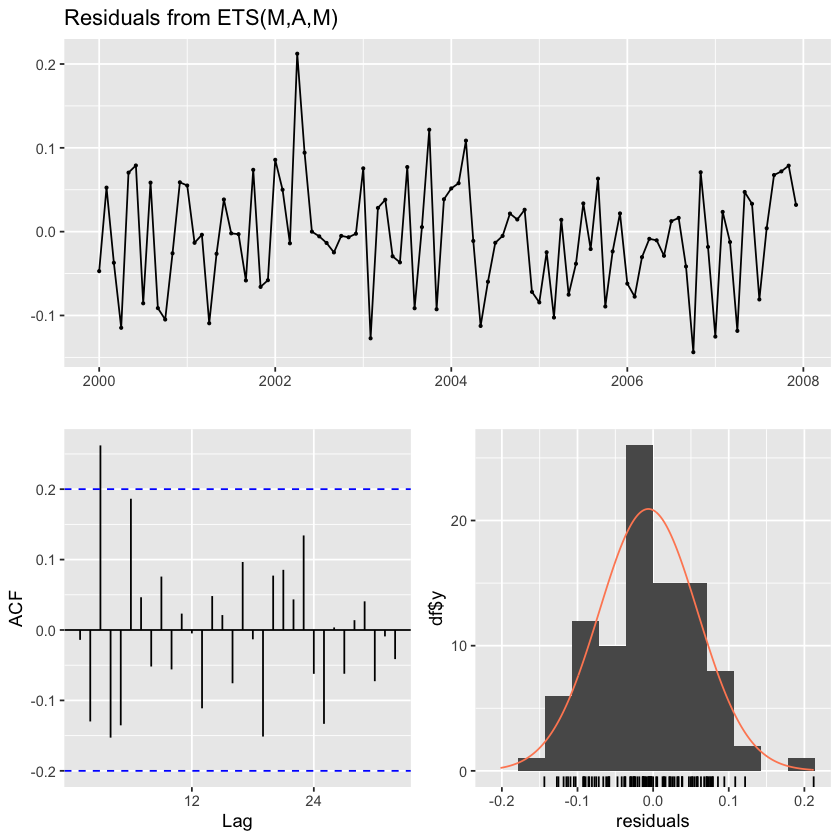

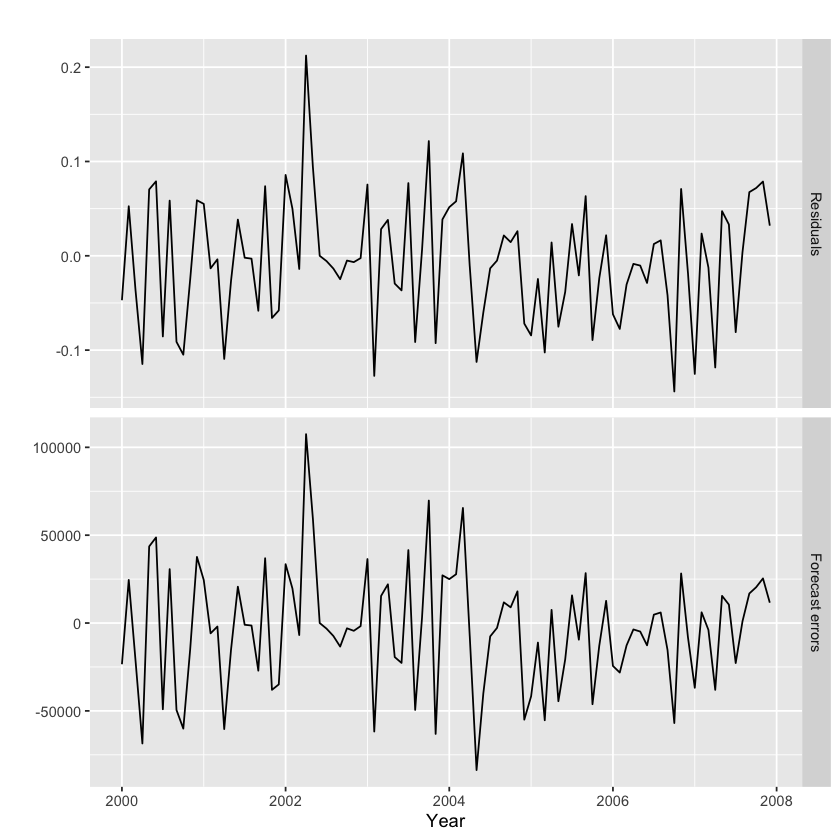

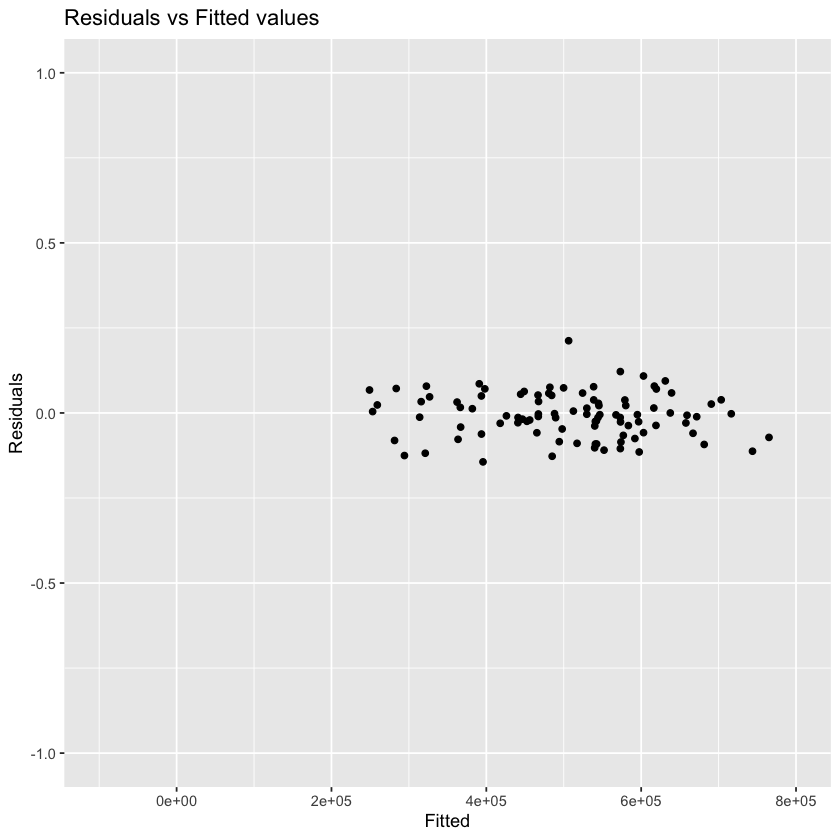

In [142]:
checkresiduals(sale_best)
nortest::ad.test(residuals(sale_best))

cbind('Residuals' = residuals(sale_best),
      'Forecast errors' = residuals(sale_best,type='response')) %>%
  autoplot(facet=TRUE) + xlab("Year") + ylab("")

# Checking for Residual plots against fitted values
cbind(Fitted = fitted(sale_best),
      Residuals = residuals(sale_best)) %>%
  as.data.frame() %>%
  ggplot(aes(x = Fitted, y = Residuals)) + geom_point() +
  ggtitle("Residuals vs Fitted values") +
  xlim(-100000, 800000) + ylim(-1, 1)

### Part 2, pce data

### Data

In [122]:
Philquarter <- read.csv("/Users/ckabandala/Desktop/FILES/PMDSA/PMDSA Files/Forecasting Analytics/Datasets/PhilQuarterData.csv", header = TRUE)

pce_data <- ts(na.omit(Philquarter$pce), start = c(1981, 1), end = c(2008, 4), frequency = 4)

#### Train & Test dataset

In [121]:
# Train & Test dataset
pce_train <- window(pce_data, end = c(2005, 4)) # Q1 1981 - Q4 2005
pce_test <- window(pce_data, start = c(2006, 1)) # Q1 2006 - Q4 2008

#### 1)

**Show the best performing model based on the AICc of the training dataset**

In [17]:
pce_best <- ets(pce_train, model = "ZZZ")
summary(pce_best)

# Best model is A,A,A or additive Holt-Winters' method

ETS(A,A,A) 

Call:
 ets(y = pce_train, model = "ZZZ") 

  Smoothing parameters:
    alpha = 0.3154 
    beta  = 0.1138 
    gamma = 0.5858 

  Initial states:
    l = 101255.6841 
    b = 548.7882 
    s = 14442.71 -2683.739 -980.3079 -10778.66

  sigma:  1767.53

     AIC     AICc      BIC 
1965.647 1967.647 1989.093 

Training set error measures:
                   ME     RMSE      MAE       MPE      MAPE      MASE      ACF1
Training set 212.7333 1695.355 1343.578 0.1213425 0.9932114 0.2330713 0.1411876

**Show the state space system of equations form of the model with estimated parameter values**

![Alt text](<Screen Shot 2023-11-14 at 00.06.57-1.png>)

#### 2)

**Show a plot of the forecasted value of sale_app for the test data added into the plot of the full dataset.**

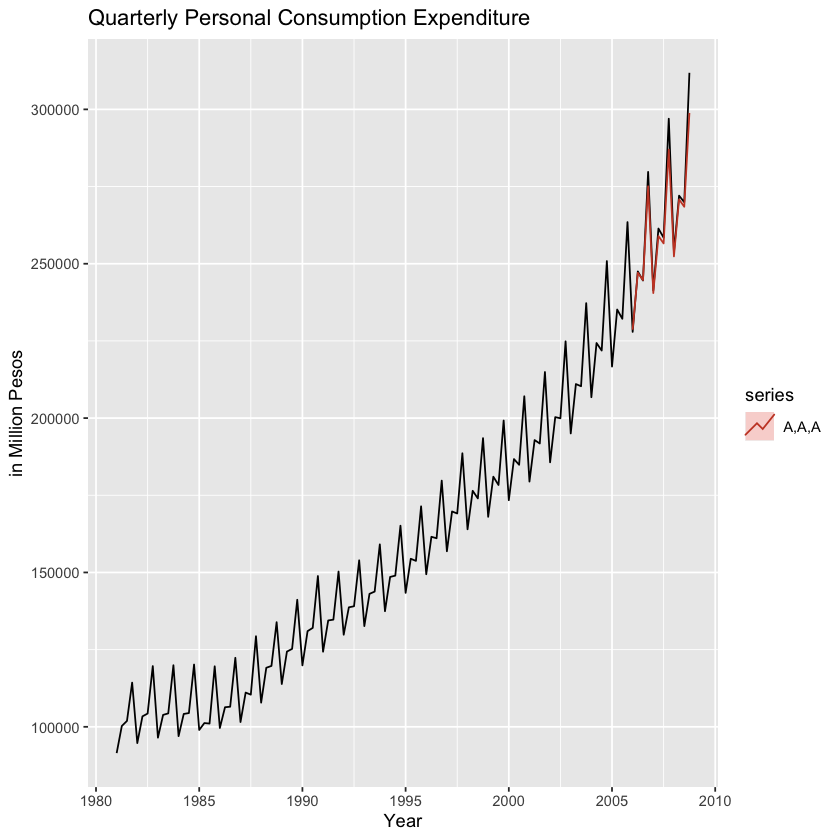

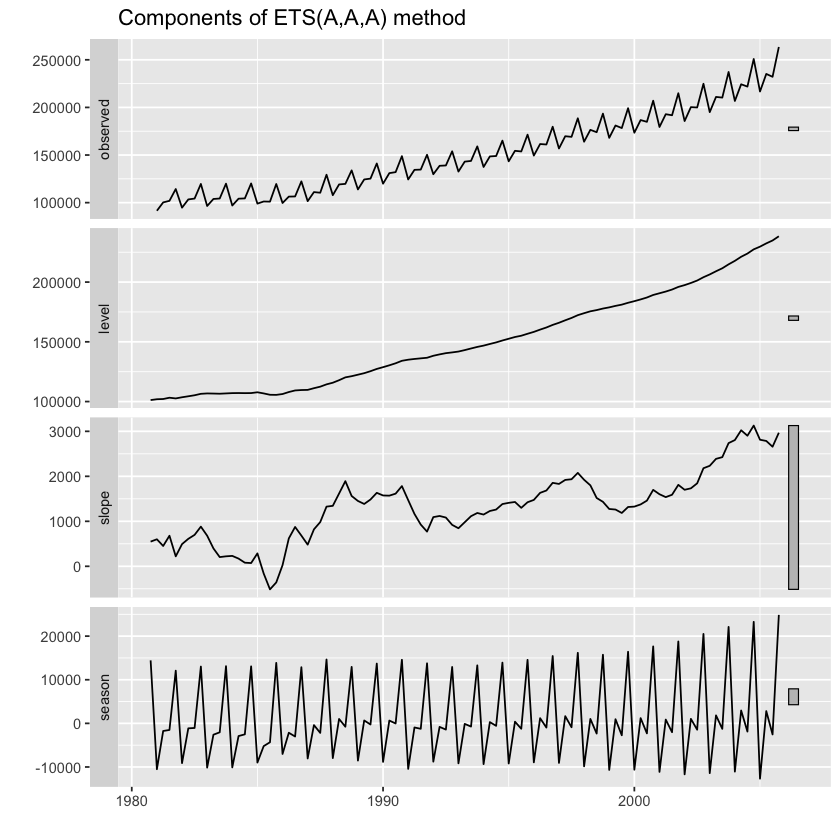

In [129]:
pce_f <- forecast(pce_best, h = 12)

autoplot(pce_data)+
    autolayer(pce_f, series="A,A,A", PI = FALSE) +
    ggtitle("Quarterly Personal Consumption Expenditure") +
    xlab("Year") + ylab("in Million Pesos")

autoplot(pce_best)

**Analyze the plot in terms of the forecasting performance selected model (1).**

Best model yielded by the ets() function is A,A,A. Fitted model performs well against the test data. However, amplitude increases over time in test data wherein it fails to capture (some spikes) by the fitted model. α (0.3154) is relatively low, which means smaller changes over time and smoother. On the other hand, β (0.1138) is also low, meaning trend is smoother. Lastly, γ (0.5858) value implies that seasonality significantly changes often over time.

#### 3)

**Generate the accuracy measures of the selected model with respect to the testing dataset.**

In [114]:
accuracy(pce_f, pce_test)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,212.7333,1695.355,1343.578,0.1213425,0.9932114,0.2330713,0.14118760,NA
Test set,3039.3750,5061.439,3178.630,1.0461535,1.1065656,0.5513989,-0.09159445,0.1867625


**Write a short analysis based on the accuracy measures.**

As what I have mentioned in the part I, I will be using MAPE for analysis. For the training set, an impressive 0.9932114% yielded by the model. For the test set, it yielded a 1.1065656%. These results produced a very low error which means that accuracy percentage in predicting is very high. Looking at how the fitted value plotted next to test data, it really captures the trend and seasonality.

#### 4)

**Check the residuals of the selected model in (1). Has the selected model in (1) comply with the properties that residuals should have for full extraction of the patterns from the time series? Any recommendations?**

The ACF plot finds 3 negative spikes at lag 3, 11, and 13. With residuals vs time plot and residuals vs fitted plot, it seems that there is no heteroscedasticity with an outlier around 1Q of 1986. Histogram shows a normal distribution. p-value for Ljung-Box test and Anderson-Darling test appear to be significant. Chosen model (A,A,A) extracts the time series well because of strong trend and seasonality.


	Ljung-Box test

data:  Residuals from ETS(A,A,A)
Q* = 13.097, df = 8, p-value = 0.1085

Model df: 0.   Total lags used: 8




	Anderson-Darling normality test

data:  residuals(pce_best)
A = 0.22155, p-value = 0.8264


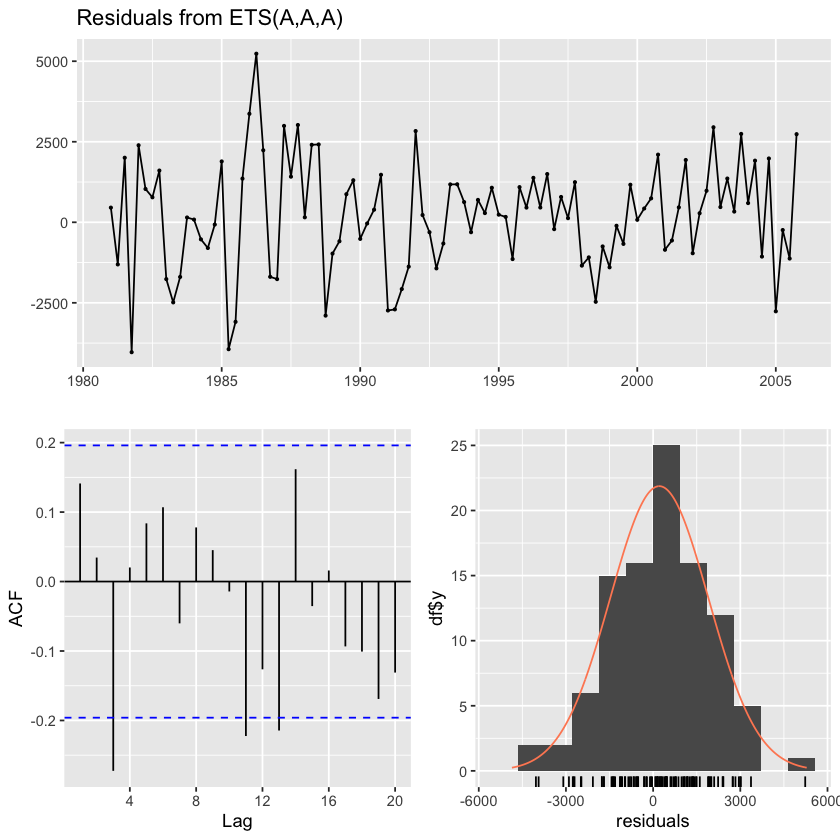

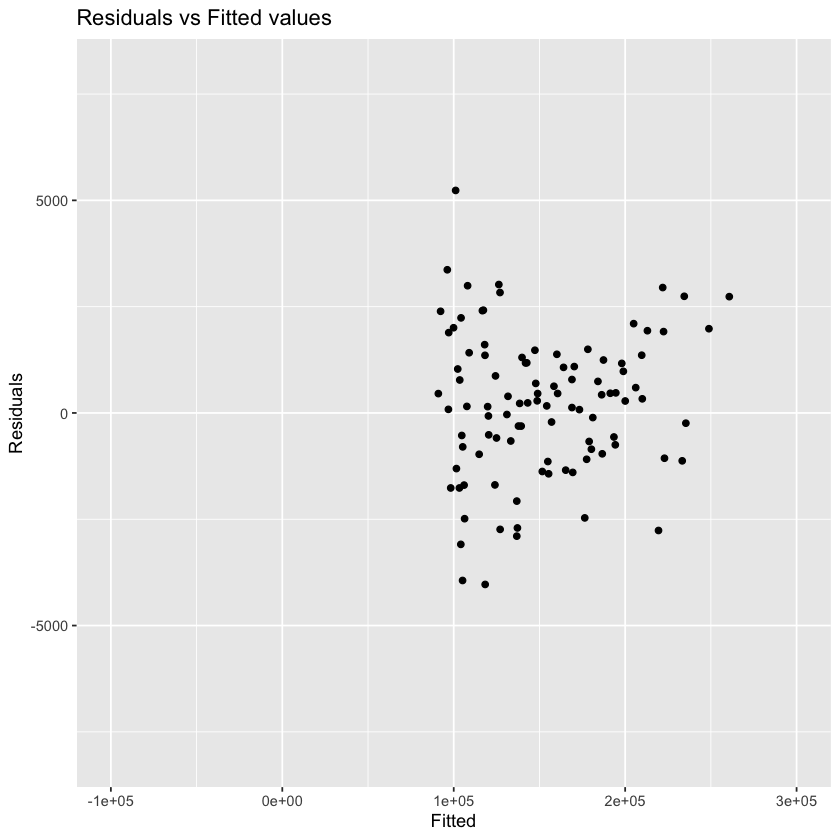

In [143]:
checkresiduals(pce_best)
nortest::ad.test(residuals(pce_best))

cbind(Fitted = fitted(pce_best),
      Residuals = residuals(pce_best)) %>%
  as.data.frame() %>%
  ggplot(aes(x = Fitted, y = Residuals)) + geom_point() +
  ggtitle("Residuals vs Fitted values") +
  xlim(-100000, 300000) + ylim(-8000, 8000)

### Appendix

##### Data of sale_app

In [115]:
sale_data

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2000,474500.0,491300.0,561800.0,528900.0,663200.0,665700.0,524800.0,555000.0,493000.0,513000.0,581300.0,676900.0
2001,468800.0,435100.0,527800.0,491700.0,558200.0,559400.0,487100.0,465800.0,438200.0,536700.0,538900.0,568100.0
2002,424400.0,413300.0,482700.0,613800.0,690600.0,637600.0,564300.0,536900.0,527400.0,592100.0,654800.0,714600.0
2003,518495.7,423300.0,560250.0,601000.0,638400.0,596400.0,580100.0,491400.0,515200.0,642800.0,618300.0,730500.0
2004,509400.0,508500.0,668500.0,664300.0,660100.0,627100.0,565300.0,543800.0,557200.0,625300.0,708600.0,710100.0
2005,452500.0,441300.0,484600.0,537300.0,547400.0,519400.0,483200.0,446600.0,477300.0,471000.0,529400.0,592744.1
2006,369300.0,335300.0,405200.0,422300.0,462300.0,428100.0,386700.0,372400.0,351600.0,338800.0,426300.0,438500.0
2007,257400.0,265300.0,310000.0,283100.0,342200.0,326350.0,258700.0,254200.0,265950.0,304000.0,348000.0,373800.0
2008,299503.0,287403.0,346505.0,306229.0,322493.0,322071.0,290698.0,278103.0,314734.0,344043.5,391781.0,441736.5
2009,238044.7,217870.3,303801.5,321495.3,373995.3,348701.5,284970.3,261957.8,256926.5,306657.8,354395.3,404350.8


##### Autoplot, Seasonplot, Subseriesplot of sale_app

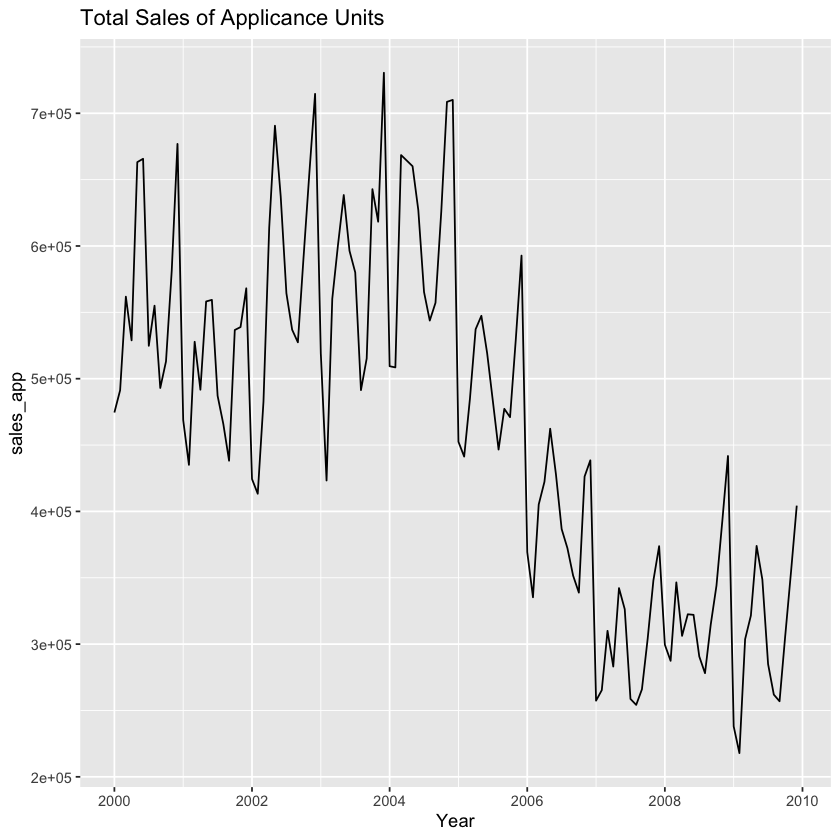

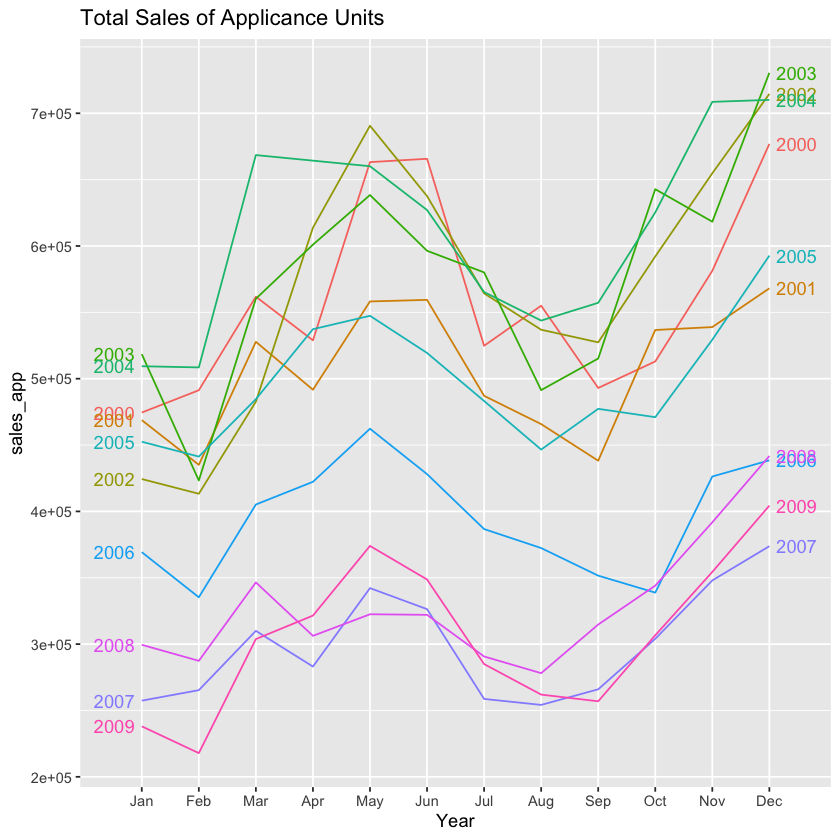

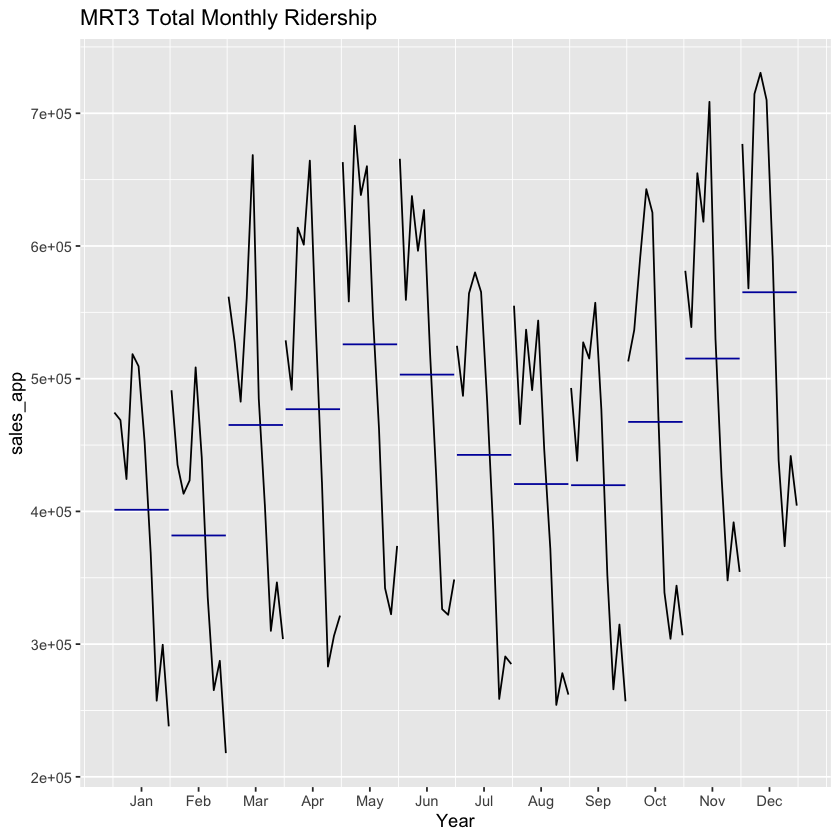

In [123]:
autoplot(sale_data) +
  ggtitle("Total Sales of Applicance Units") +
  xlab("Year") +
  ylab("sales_app")

ggseasonplot(sale_data, year.labels = TRUE, year.labels.left = TRUE) +
  ggtitle("Total Sales of Applicance Units") +
  xlab("Year") +
  ylab("sales_app")

ggsubseriesplot(sale_data) +
  ggtitle("MRT3 Total Monthly Ridership") +
  xlab("Year") +
  ylab("sales_app")

##### Train & Test dataset of sale_app

In [116]:
sale_train
sale_test

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2000,474500.0,491300.0,561800.0,528900.0,663200.0,665700.0,524800.0,555000.0,493000.0,513000.0,581300.0,676900.0
2001,468800.0,435100.0,527800.0,491700.0,558200.0,559400.0,487100.0,465800.0,438200.0,536700.0,538900.0,568100.0
2002,424400.0,413300.0,482700.0,613800.0,690600.0,637600.0,564300.0,536900.0,527400.0,592100.0,654800.0,714600.0
2003,518495.7,423300.0,560250.0,601000.0,638400.0,596400.0,580100.0,491400.0,515200.0,642800.0,618300.0,730500.0
2004,509400.0,508500.0,668500.0,664300.0,660100.0,627100.0,565300.0,543800.0,557200.0,625300.0,708600.0,710100.0
2005,452500.0,441300.0,484600.0,537300.0,547400.0,519400.0,483200.0,446600.0,477300.0,471000.0,529400.0,592744.1
2006,369300.0,335300.0,405200.0,422300.0,462300.0,428100.0,386700.0,372400.0,351600.0,338800.0,426300.0,438500.0
2007,257400.0,265300.0,310000.0,283100.0,342200.0,326350.0,258700.0,254200.0,265950.0,304000.0,348000.0,373800.0


,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2008,299503.0,287403.0,346505.0,306229.0,322493.0,322071.0,290698.0,278103.0,314734.0,344043.5,391781.0,441736.5
2009,238044.7,217870.3,303801.5,321495.3,373995.3,348701.5,284970.3,261957.8,256926.5,306657.8,354395.3,404350.8


##### Forecasted values of sale_app

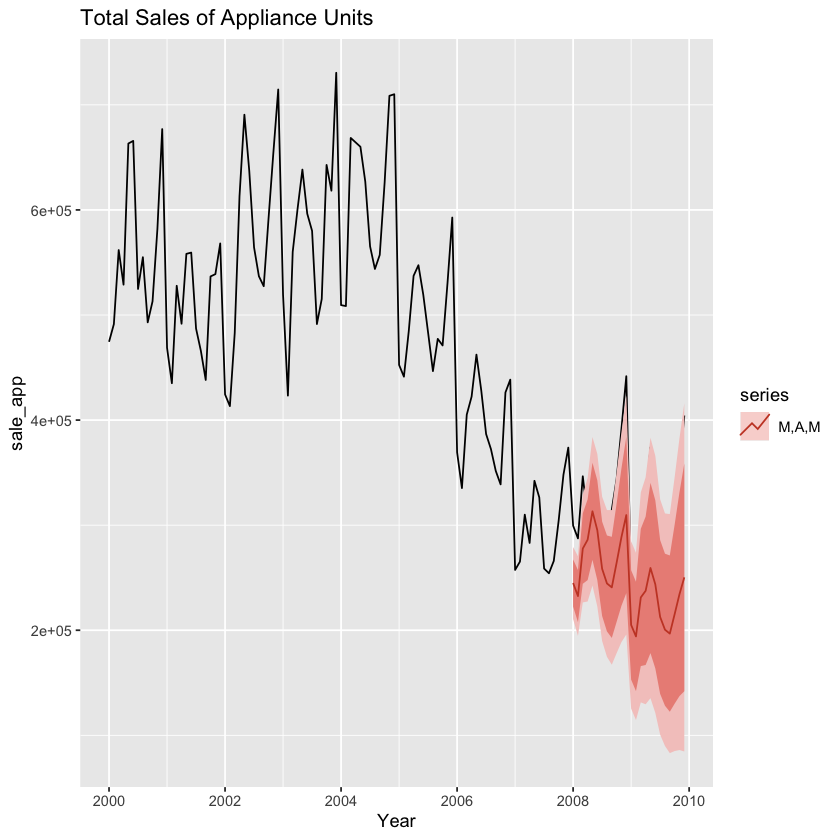

In [128]:
autoplot(sale_data)+
    autolayer(sale_bestf, series="M,A,M") +
    ggtitle("Total Sales of Appliance Units") + xlab("Year") +
    ylab("sale_app")

##### Data of pce

In [117]:
pce_data

,Qtr1,Qtr2,Qtr3,Qtr4
1981,91481.0,100260.0,101908.0,114309.0
1982,94727.0,103382.0,104297.0,119661.0
1983,96487.0,103859.0,104348.0,119940.0
1984,96978.0,104169.0,104453.0,120167.0
1985,98973.0,101214.0,101051.0,119594.0
1986,99619.0,106344.0,106506.0,122346.0
1987,101545.0,111092.0,110414.0,129335.0
1988,107828.0,119124.0,119721.0,133889.0
1989,113865.0,124365.0,125241.0,141148.0
1990,119902.0,130988.0,132046.0,148836.0


##### Autoplot, Seasonplot, Subseriesplot of pce

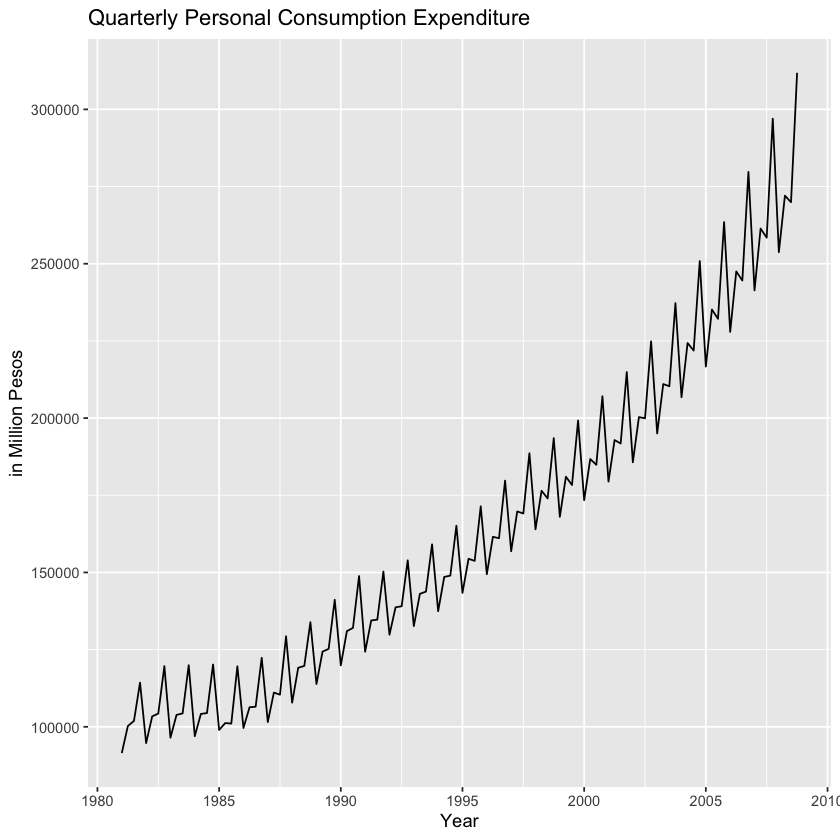

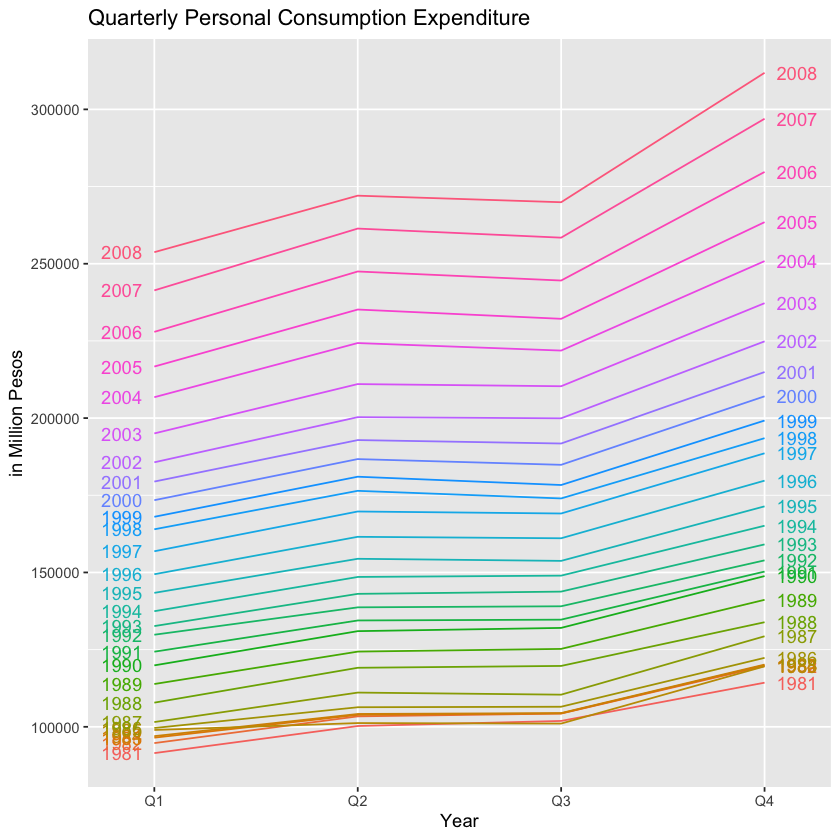

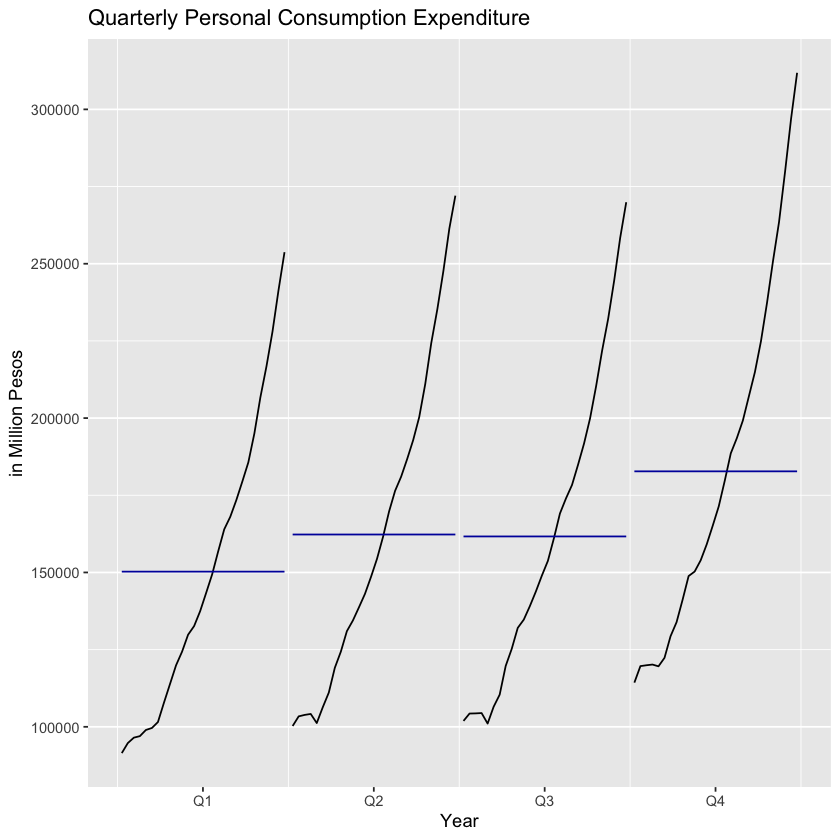

In [124]:
autoplot(pce_data) +
  ggtitle("Quarterly Personal Consumption Expenditure") +
  xlab("Year") +
  ylab("in Million Pesos")

ggseasonplot(pce_data, year.labels = TRUE, year.labels.left = TRUE) +
  ggtitle("Quarterly Personal Consumption Expenditure") +
  xlab("Year") +
  ylab("in Million Pesos")

ggsubseriesplot(pce_data) +
  ggtitle("Quarterly Personal Consumption Expenditure") +
  xlab("Year") +
  ylab("in Million Pesos")

##### Train & Test dataset of pce

In [118]:
pce_train
pce_test

,Qtr1,Qtr2,Qtr3,Qtr4
1981,91481.0,100260.0,101908.0,114309.0
1982,94727.0,103382.0,104297.0,119661.0
1983,96487.0,103859.0,104348.0,119940.0
1984,96978.0,104169.0,104453.0,120167.0
1985,98973.0,101214.0,101051.0,119594.0
1986,99619.0,106344.0,106506.0,122346.0
1987,101545.0,111092.0,110414.0,129335.0
1988,107828.0,119124.0,119721.0,133889.0
1989,113865.0,124365.0,125241.0,141148.0
1990,119902.0,130988.0,132046.0,148836.0


,Qtr1,Qtr2,Qtr3,Qtr4
2006,227928.3,247501.7,244560.8,279737.0
2007,241363.4,261401.6,258445.6,296965.8
2008,253744.0,272054.0,269923.0,311848.0


##### Forecasted values of pce

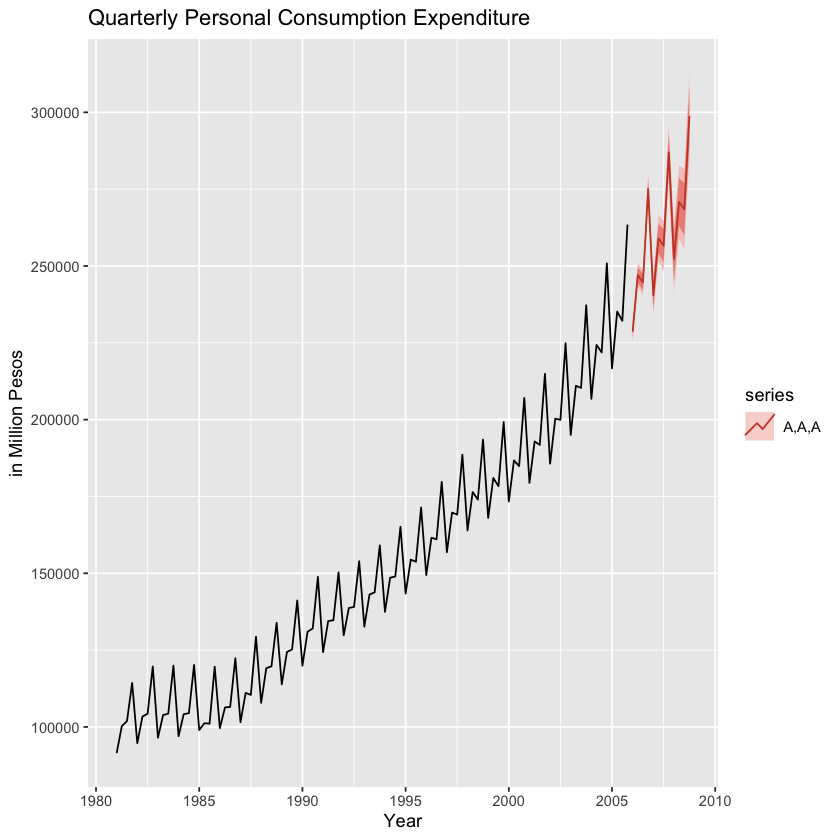

In [130]:
autoplot(pce_train)+
    autolayer(pce_f, series="A,A,A") +
    ggtitle("Quarterly Personal Consumption Expenditure") +
    xlab("Year") + ylab("in Million Pesos")